## Climate Change on Agriculture

Group 1

As global temperatures rise and precipitation patterns change, agricultural practices are forced to adapt. Understanding how climate and adaptation strategies impact crop yields and economic outcomes is crucial for mitigating the effects of climate change on food production.
By analyzing how different regions are responding to climate variability, we can identify successful strategies that could be applied globally to ensure food security.

#### The data
This dataset includes agricultural data from 1990 to 2024, covering a wide range of crops, countries, and regions. It tracks factors like temperature, precipitation, CO2 emissions, crop yields, and economic impacts.
Size of Data: The dataset contains 10,000 records across 10 countries, with 10 attributes per entry, including crop types, climate data, and adaptation strategies.

Attributes: 
- Year (1990 - 2024)
- Country
- Crop Type (barley, coffee, corn, cotton, fruits, rice, soybeans, sugarcane, vegetables, wheat)
- Average Temperature (°C)
- Total Precipitation (mm)
- CO2 Emissions (metric tons)
- Crop Yield (metric tons per hectare)
- Extreme Weather Events (0 - 10)
- Irrigation Access (0 - 100)
- Pesticide Use (kilogram per hectare)
- Fertilizer Use (kilogram per hectare)
- Soil Health Index (0 - 100)
- Adaption Strategies (crop rotation, drought-resistant crops, organic farming, water management, no adaptation)
- Economic Impact (in million USD)

In [20]:
# data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt

data = pd.read_csv('climate_change_impact_on_agriculture_2024.csv')

data.head()

Year Country         Region  Crop_Type  Average_Temperature_C  \
0  2001   India    West Bengal       Corn                   1.55   
1  2024   China          North       Corn                   3.23   
2  2001  France  Ile-de-France      Wheat                  21.11   
3  2001  Canada       Prairies     Coffee                  27.85   
4  1998   India     Tamil Nadu  Sugarcane                   2.19   

   Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
0                  447.06             15.22                 1.737   
1                 2913.57             29.82                 1.737   
2                 1301.74             25.75                 1.719   
3                 1154.36             13.91                 3.890   
4                 1627.48             11.81                 1.080   

   Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
0                       8                14.54                    10.08   
1                       8                11.05                    33.06   
2                       5                84.42                    27.41   
3                       5                94.06                    14.38   
4                       9                95.75                    44.35   

   Fertilizer_Use_KG_per_HA  Soil_Health_Index Adaptation_Strategies  \
0                     14.78              83.25      Water Management   
1                     23.25              54.02         Crop Rotation   
2                     65.53              67.78      Water Management   
3                     87.58              91.39         No Adaptation   
4                     88.08              49.61         Crop Rotation   

   Economic_Impact_Million_USD  
0                       808.13  
1                       616.22  
2                       796.96  
3                       790.32  
4                       401.72

### Visualization 1: Global Crop Yield Over Time

Map of crop yield over time across the globe

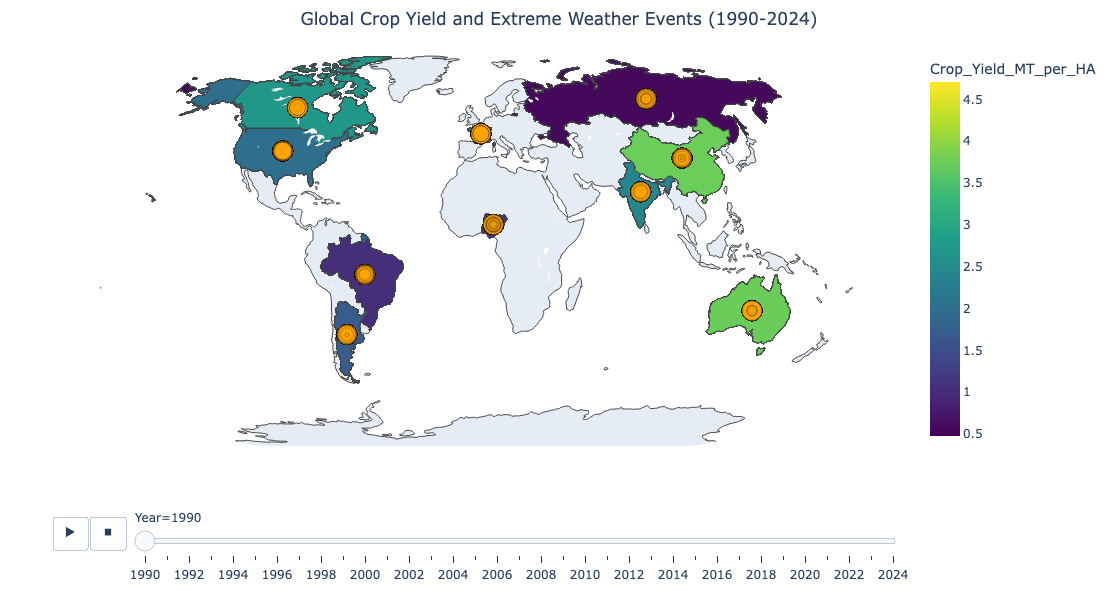

In [9]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
data = pd.read_csv('climate_change_impact_on_agriculture_2024.csv')

# Convert 'Year' column to integer and sort chronologically
data['Year'] = data['Year'].astype(int)
data = data.sort_values(by='Year')

# Convert 'Year' to string for the animation frame
data['Year'] = data['Year'].astype(str)

# Calculate min and max crop yields per year for dynamic color range
min_max_yields = data.groupby('Year')['Crop_Yield_MT_per_HA'].agg(['min', 'max']).to_dict('index')

# Function to set dynamic color range for each year
def get_color_range(year):
    return [min_max_yields[year]['min'], min_max_yields[year]['max']]

# Create the choropleth map for crop yield
fig = px.choropleth(
    data,
    locations="Country",
    locationmode="country names",
    color="Crop_Yield_MT_per_HA",
    hover_name="Country",
    animation_frame="Year",
    title="Global Crop Yield and Extreme Weather Events (1990-2024)",
    color_continuous_scale="Viridis"
)

# Adjust color scale dynamically for each frame
for frame in fig.frames:
    year = frame.name
    color_range = get_color_range(year)
    for data_trace in frame.data:
        data_trace.update(zmin=color_range[0], zmax=color_range[1])

# Add bubble markers for extreme weather events, scaled down for better visibility
for year in data['Year'].unique():
    year_data = data[data['Year'] == year]
    fig.add_trace(go.Scattergeo(
        locationmode='country names',
        locations=year_data['Country'],
        text=year_data['Country'] + '<br>Extreme Weather Events: ' + year_data['Extreme_Weather_Events'].astype(str),
        marker=dict(
            size=year_data['Extreme_Weather_Events'] * 2,  # Adjusted scaling factor
            color='orange',
            opacity=0.6,
            line=dict(width=0.5, color='black')
        ),
        showlegend=False  # Hide the legend for extreme weather events
    ))

# Update layout for better presentation
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type="natural earth"
    ),
    title_x=0.5,
    width=1000,
    height=600,
    legend_title="Crop Yield (MT per HA)",
    margin=dict(l=50, r=50, t=50, b=50)
)

# Show the interactive map
fig.show()


### Visualization 2: Temperature on Crop Yield
This chart identifies temperature thresholds where crop yields decline, while also taking into account severe weather events

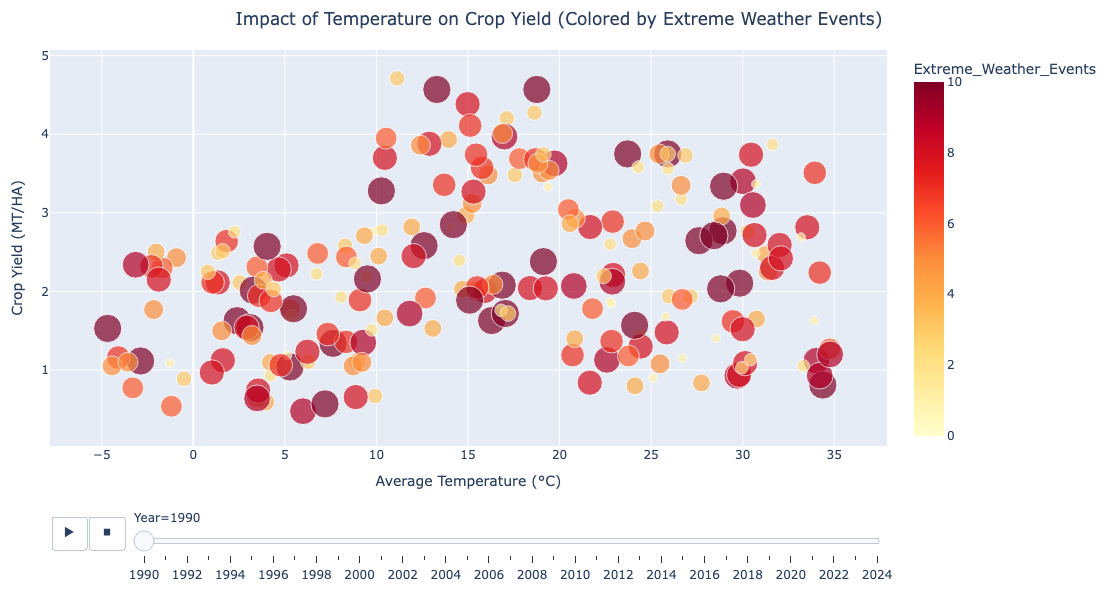

In [16]:
import plotly.express as px

# Scatter plot of Temperature vs. Crop Yield, colored by Extreme Weather Events
fig = px.scatter(
    data,
    x="Average_Temperature_C",
    y="Crop_Yield_MT_per_HA",
    color="Extreme_Weather_Events",
    size="Extreme_Weather_Events",
    hover_name="Country",
    animation_frame="Year",
    title="Impact of Temperature on Crop Yield (Colored by Extreme Weather Events)",
    color_continuous_scale="YlOrRd",
    labels={
        "Average_Temperature_C": "Average Temperature (°C)",
        "Crop_Yield_MT_per_HA": "Crop Yield (MT/HA)"
    }
)

fig.update_layout(
    width=900,
    height=600,
    title_x=0.5,
    margin=dict(l=50, r=50, t=50, b=50)
)
fig.show()


### 3. Heatmap of Soil Health by Country and Year
Mapping soil health by country and year, we can examine what happened for certain countries in good soil health years and in years with poor soil health

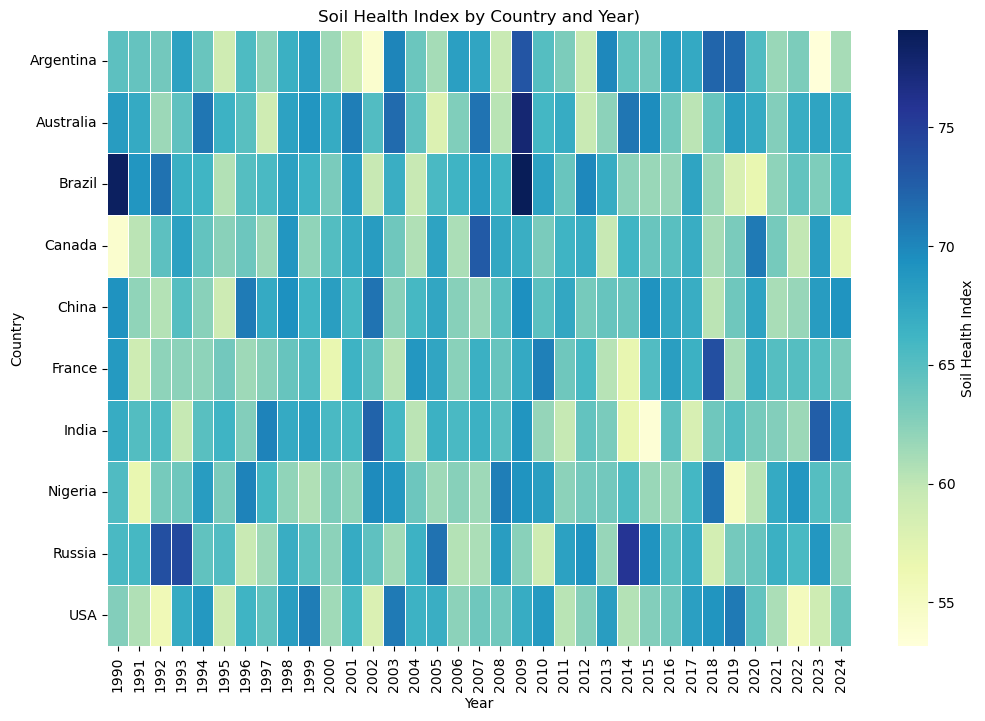

In [39]:
# Aggregate data by country and year
heatmap_data = data.groupby(['Country', 'Year'])[['Soil_Health_Index', 'Fertilizer_Use_KG_per_HA']].mean().reset_index()

# Pivot data for heatmap
soil_health_pivot = heatmap_data.pivot(index='Country', columns='Year', values='Soil_Health_Index')


# Plot heatmap with annotations for Fertilizer Use
plt.figure(figsize=(12, 8))
sns.heatmap(
    soil_health_pivot,
    cmap="YlGnBu",
    fmt=".1f",
    linewidths=.5,
    cbar_kws={"label": "Soil Health Index"}
)

plt.title("Soil Health Index by Country and Year")
plt.xlabel("Year")
plt.ylabel("Country")
plt.show()


In [18]:
# identifying key countries
data = pd.read_csv('climate_change_impact_on_agriculture_2024.csv')

# Group by country to find the average soil health index
country_soil_health = data.groupby('Country')['Soil_Health_Index'].mean().reset_index()

# Sort to find countries with the highest and lowest soil health
top_soil_health_countries = country_soil_health.sort_values(by='Soil_Health_Index', ascending=False).head(5)
low_soil_health_countries = country_soil_health.sort_values(by='Soil_Health_Index', ascending=True).head(5)

print("Top 5 Countries with Highest Soil Health Index:")
print(top_soil_health_countries)

print("\nTop 5 Countries with Lowest Soil Health Index:")
print(low_soil_health_countries)


Top 5 Countries with Highest Soil Health Index:
     Country  Soil_Health_Index
1  Australia          66.037229
4      China          65.394035
8     Russia          65.354745
2     Brazil          65.272468
6      India          64.709161

Top 5 Countries with Lowest Soil Health Index:
     Country  Soil_Health_Index
3     Canada          64.235407
7    Nigeria          64.357318
0  Argentina          64.523679
9        USA          64.542975
5     France          64.580910


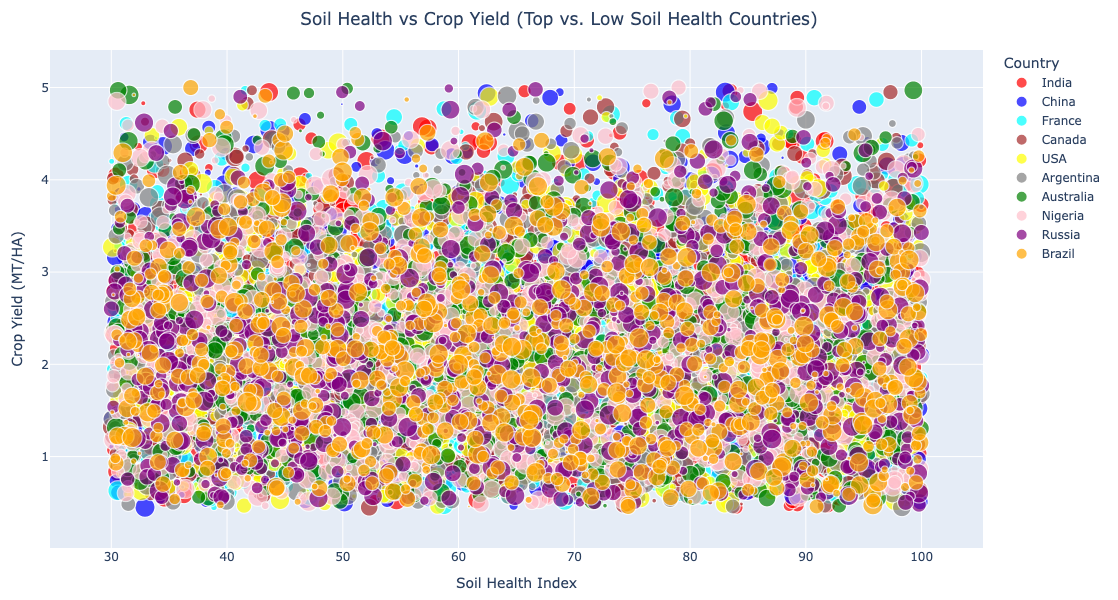

In [22]:
import plotly.express as px

# Scatter plot for Soil Health vs Crop Yield
fig = px.scatter(
    filtered_data,
    x="Soil_Health_Index",
    y="Crop_Yield_MT_per_HA",
    color="Country",
    size="Fertilizer_Use_KG_per_HA",
    title="Soil Health vs Crop Yield (Top vs. Low Soil Health Countries)",
    labels={
        "Soil_Health_Index": "Soil Health Index",
        "Crop_Yield_MT_per_HA": "Crop Yield (MT/HA)",
        "Fertilizer_Use_KG_per_HA": "Fertilizer Use (KG/HA)"
    },
    color_discrete_map={
        "Australia": "green", "China": "blue", "Russia": "purple",
        "Brazil": "orange", "India": "red",
        "Canada": "brown", "Nigeria": "pink", "Argentina": "gray",
        "USA": "yellow", "France": "cyan"
    }
)

fig.update_layout(
    width=900,
    height=600,
    title_x=0.5,
    margin=dict(l=50, r=50, t=50, b=50)
)
fig.show()


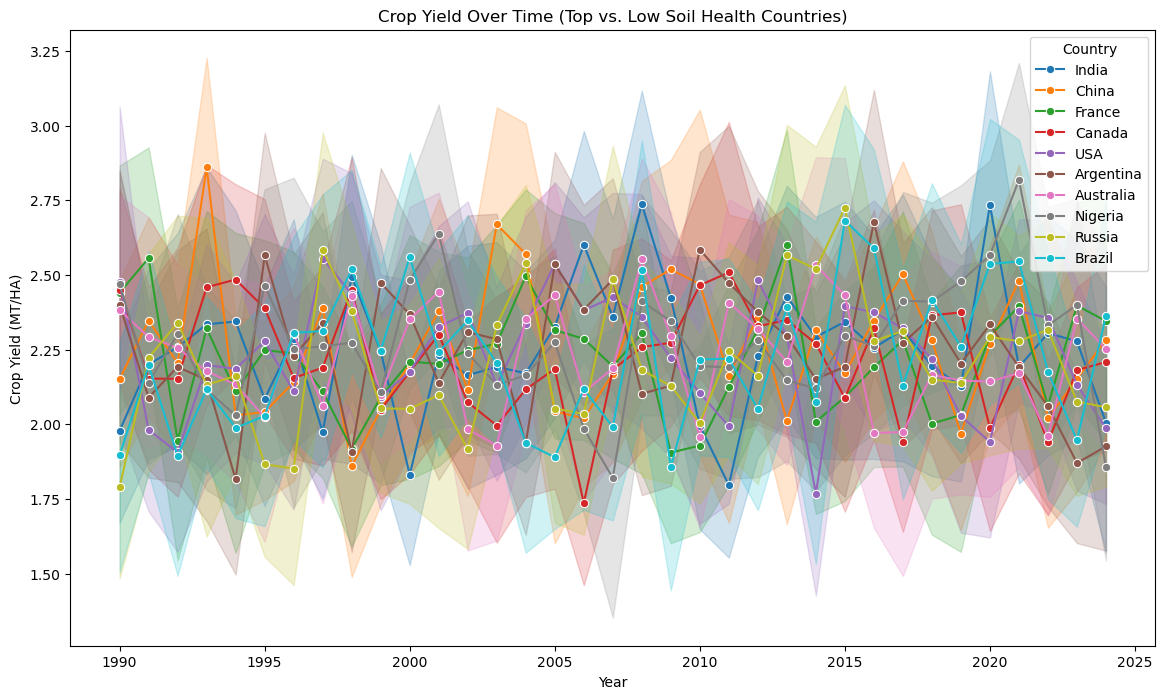

In [21]:
# Line plot for Crop Yield over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=filtered_data, x="Year", y="Crop_Yield_MT_per_HA", hue="Country", marker="o")
plt.title("Crop Yield Over Time (Top vs. Low Soil Health Countries)")
plt.ylabel("Crop Yield (MT/HA)")
plt.xlabel("Year")
plt.legend(title="Country")
plt.show()


### 4. Analyzing soil health factors from above
Argentina (2002, 2023) and India (2015) stand out as having significantly low soil health whereas Brazil (1990, 2009) have healthy soil; we want to analyze the relationship between fertilizer use and the health of their soil and if this has impact on crop yields. 

count    35.000000
mean     15.246678
std       0.623391
min      14.048000
25%      14.777608
50%      15.083139
75%      15.747141
max      16.387443
Name: Average_Temperature_C, dtype: float64


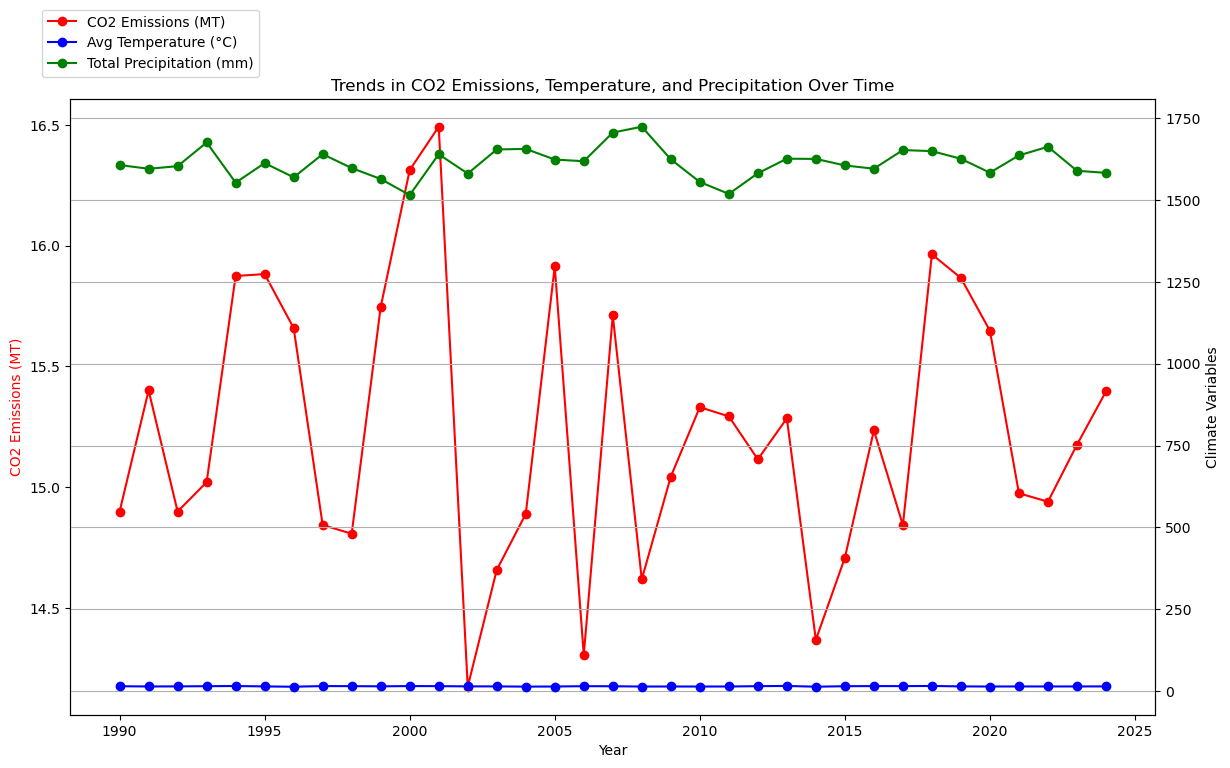

In [23]:
# Group data by year and calculate average CO2, temperature, and precipitation
climate_trends = data.groupby('Year')[['CO2_Emissions_MT', 'Average_Temperature_C', 'Total_Precipitation_mm']].mean().reset_index()

# Plotting CO2 Emissions, Temperature, and Precipitation over time
fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.plot(climate_trends['Year'], climate_trends['CO2_Emissions_MT'], color='red', label='CO2 Emissions (MT)', marker='o')
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 Emissions (MT)', color='red')

ax2 = ax1.twinx()
ax2.plot(climate_trends['Year'], climate_trends['Average_Temperature_C'], color='blue', label='Avg Temperature (°C)', marker='o')
ax2.plot(climate_trends['Year'], climate_trends['Total_Precipitation_mm'], color='green', label='Total Precipitation (mm)', marker='o')
ax2.set_ylabel('Climate Variables', color='black')

fig.legend(loc='upper left', bbox_to_anchor=(0.1, 1))
plt.title("Trends in CO2 Emissions, Temperature, and Precipitation Over Time")
plt.grid()


print(climate_trends['Average_Temperature_C'].describe())

